# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.TextDetectors.base import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("By")
PATH_TO_DATASET = info["dataset_path"]

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'/mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2020-10-09'

In [6]:
DATASET_NAME = "by"
VERSION = "2021_07_13_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/mnt/store/nomeroff-net/nomeroff-net/models/anpr_ocr_by_2021_07_13_pytorch_lightning.ckpt'

In [8]:
class by(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        

        # Train hyperparameters
        self.batch_size = 16
        self.epochs = 50
        self.gpus = 1

In [9]:
ocrTextDetector = by()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=6)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'7', 'P', '4', 'T', '8', 'H', 'X', 'C', '9', 'E', '3', 'A', 'I', '0', '1', '5', '6', 'O', 'K', 'M', '2', 'B'}
Letters val  {'7', 'P', '4', 'T', '8', 'H', 'X', 'C', '9', 'E', '3', 'A', 'I', '0', '1', '5', '6', 'O', 'K', 'M', '2', 'B'}
Letters test  {'7', 'P', '4', 'T', '8', 'H', 'X', 'C', '9', 'E', '3', 'A', 'I', '0', '1', '5', '6', 'O', 'K', 'M', '2', 'B'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Restored states from the checkpoint file at /mnt/store/nomeroff-net/nomeroff-net/train/lr_find_temp_model.ckpt


Found lr: 0.5011872336272719



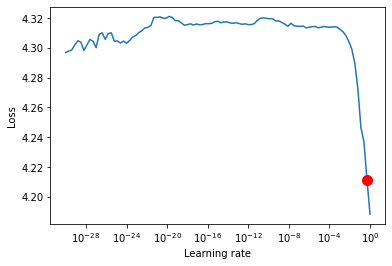

In [11]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


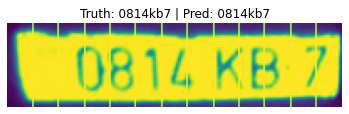

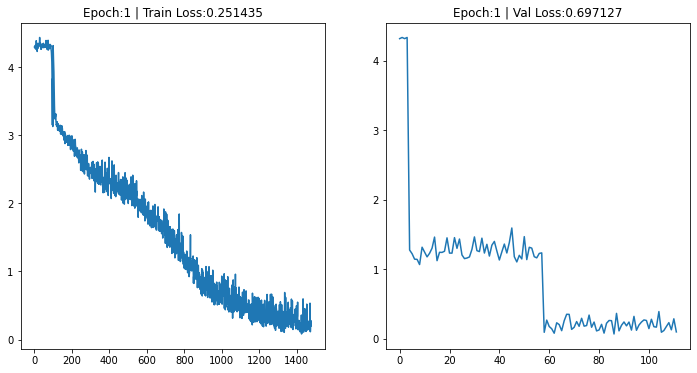

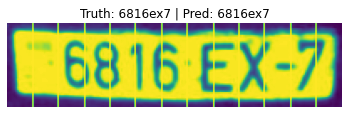

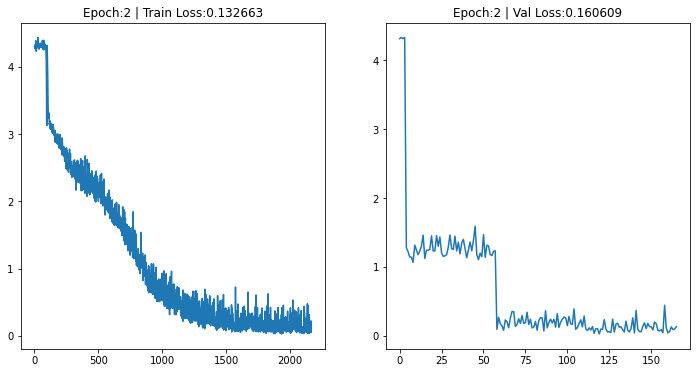

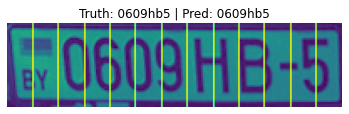

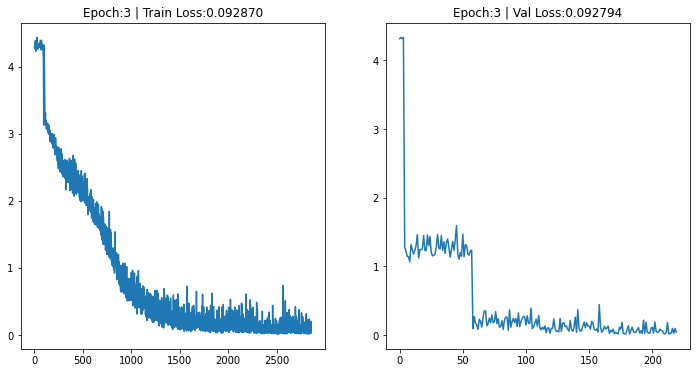

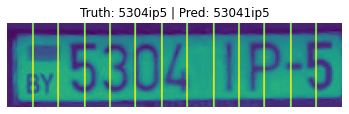

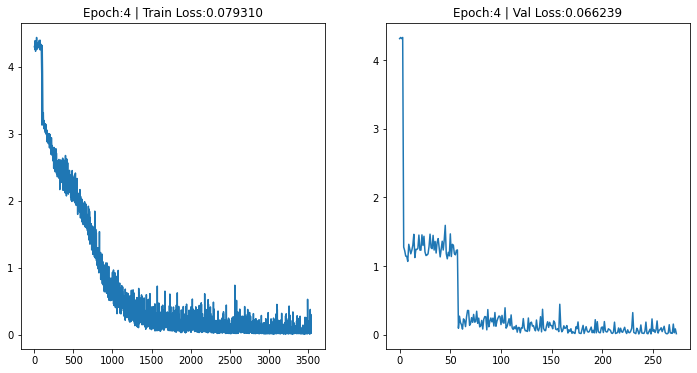

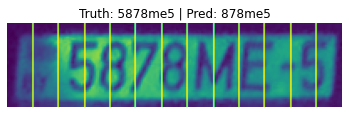

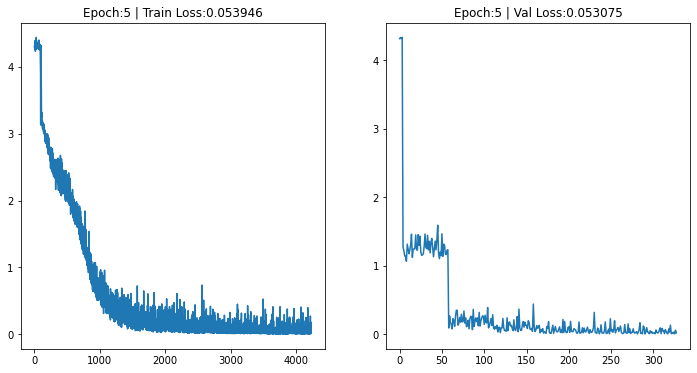

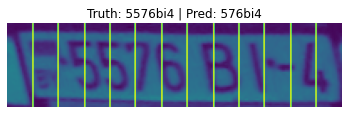

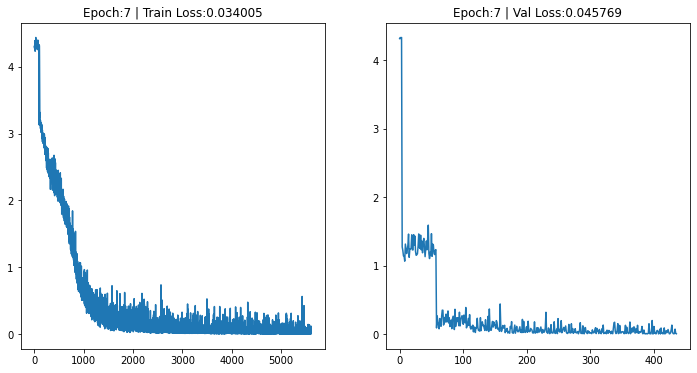

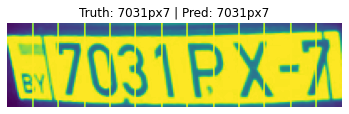

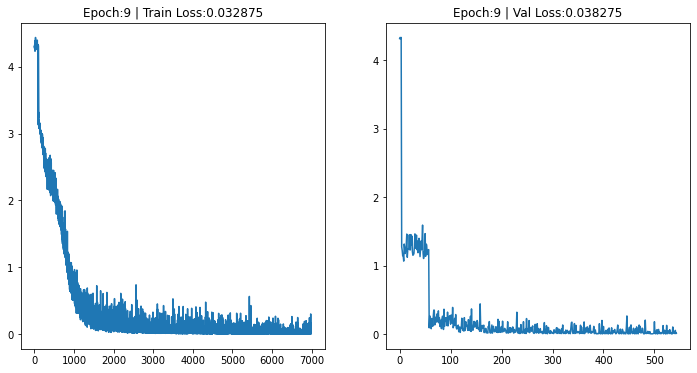

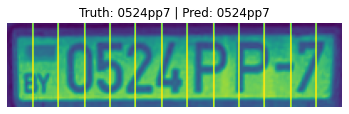

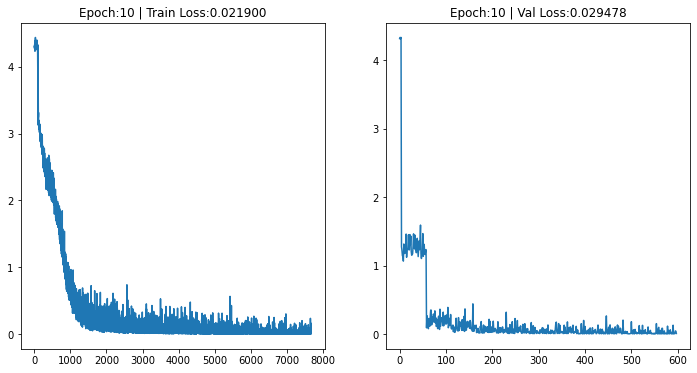

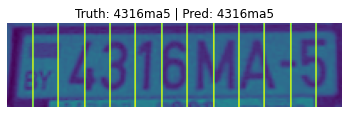

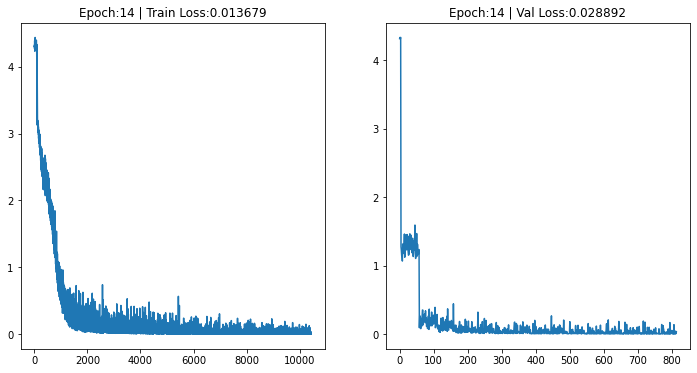

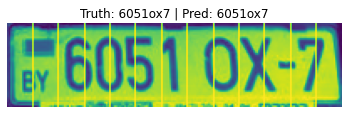

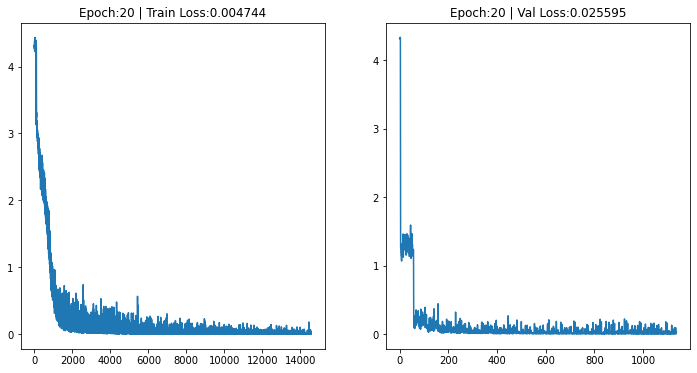

Epoch    27: reducing learning rate of group 0 to 2.0000e-03.


Epoch    33: reducing learning rate of group 0 to 2.0000e-04.


In [ ]:
ocrTextDetector.train()

In [ ]:
ocrTextDetector.save(RESULT_MODEL_PATH)

In [ ]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

In [ ]:
ocrTextDetector.test_acc(verbose=True)

In [ ]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)